<a href="https://colab.research.google.com/github/HimanshuSahoo/DATA-SCIENCE/blob/main/P72_project_Data_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#data processing libraries 

from sklearn import preprocessing

#Text Processing libraries
import nltk
nltk.download('stopwords')
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

#Model libraries
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#import data
data = pd.read_csv('emails1.txt')

## EDA

### Explore Dataset

In [ ]:
data.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [ ]:
# we only need content and class column

data.drop(['Unnamed: 0','filename','Message-ID'],axis = 1,inplace = True)

data.head(10)

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
5,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive
6,Do you know my hr rep's name?\n\n\n\nJennifer ...,Abusive
7,sorry i've taken so long...just been trying to...,Abusive
8,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
9,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive


In [ ]:
print("This dataset has",data.shape[0],"rows and",data.shape[1],"columns")

This dataset has 48076 rows and 2 columns


In [ ]:
data.iloc[3400:3420,:]

,content,Class
3400,Hate to pile on but I think KM is circling the...,Abusive
3401,"Robert, Here are the two messages from ""Jef...",Abusive
3402,This is a very tough time. I honestly don't kn...,Abusive
3403,Arkansas joke:\n\n\nGuy is driving down a rura...,Abusive
3404,"John,\nThanks for the note. Yeah things look p...",Abusive
3405,There is a lot of confused bullshit floating a...,Abusive
3406,"wow, three weeks away from the kids ! brave an...",Abusive
3407,\ngot this from late friday. have you ever hea...,Abusive
3408,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive
3409,"\nMonday Jan 7,\nBom traded 33 , 33 , 32.75 , ...",Abusive


In [ ]:
#Abusive Example
print(data['content'][3524])

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/07/2000 
12:42 PM ---------------------------
   
	
	
	From:  Jay Reitmeyer                           08/07/2000 10:39 AM
	

To: Phillip K Allen/HOU/ECT@ECT, Keith Holst/HOU/ECT@ect
cc:  
Subject: New Socal Curves





In [ ]:

#Abusive Example
print(data['content'][55])

the bitch would like you to change the 1.5 MM bid/offer to 7 MM


In [ ]:
data['Class'].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

This is not a balanced dataset.

## Transform

### Missing values

In [ ]:
#Check if we have missing values
data.isnull().sum()

content    0
Class      0
dtype: int64

### Duplicates

In [ ]:
#Check if we have duplicates values
data.duplicated().sum()

23420

In [ ]:
# drop duplicates
data.drop_duplicates(keep = 'first',inplace=True)

In [ ]:
data.Class.value_counts()

Non Abusive    23014
Abusive         1642
Name: Class, dtype: int64

## Data Preprocessing

In [ ]:
# Label encoding the Class column : Abusive = 0 and Non Abusive = 1

le = preprocessing.LabelEncoder()
data['Class'] = le.fit_transform(data.Class)

In [ ]:
data.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


### NLP : Text Processing

In [ ]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

### Tokenize, Clean, Normalise

In [ ]:
#Write a tokenization function to process/ clean text data (content)

def tokenize(text):

   #1. Normalize: Convert to lower case and remove punctuation
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    
   #2. Tokenizing: split text into words
    tokens = word_tokenize(text)
    
   #3. Remove stop words: if a token is a stop word, then remove it
    words = [w for w in tokens if w not in stop_words]
    
    #4. Lemmatize 
    lemmed_words = [lemmatizer.lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
        ## back to string from list
    text = " ".join(clean_tokens)
    return text

In [ ]:
tokenize("Dancing is 1234 $%^ my@$passion")

'dancing passion'

In [ ]:
data['clean_Text'] = data['content'].apply(lambda x: tokenize(x))
data.head()

,content,Class,clean_Text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,eat shit john j lavorato excelr pm john arnold...
1,fuck you,0,fuck
2,Gentlemen:\nThe following champagne is availab...,0,gentleman following champagne available approx...
3,sorry i've taken so long...just been trying to...,0,sorry taken long trying fend chick life sooooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,asshole john j lavorato excelr john arnold hou...


In [ ]:

# assign the independent features (text) to X variable and the target to y
X = pd.DataFrame(data['clean_Text'])
y = data['Class']

### WordCloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color= 'black')

In [ ]:
wc_text_na = data[data['Class'] == 1]['clean_Text'].str.cat(sep=' ')

In [ ]:
wc_text_a = data[data['Class'] == 0]['clean_Text'].str.cat(sep=' ')

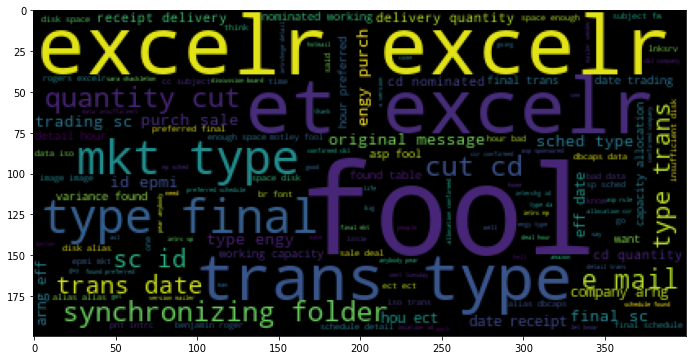

In [ ]:
#plotting wordcloud based on abusive words present.
plt.figure(figsize=(12,6))
plt.imshow(wc.generate(wc_text_a))

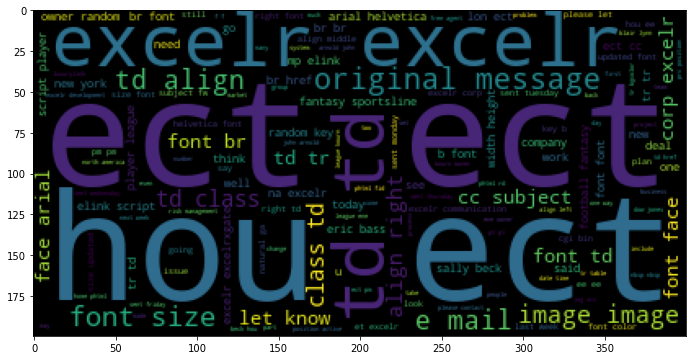

In [ ]:
#plotting wordcloud based on non-abusive words present.
plt.figure(figsize=(12,6))
plt.imshow(wc.generate(wc_text_na))

## Data Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler(sampling_strategy=0.4)

In [ ]:
X_rs, y_rs = os.fit_resample(X,y)

In [ ]:
y_rs.shape

(32219,)

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y))

Counter({1: 23014, 0: 1642})


In [ ]:
print(Counter(y_rs))

Counter({1: 23014, 0: 9205})


## Split the dataset into Train and Test sets¶

In [ ]:
#split data into training 77% and test 33%
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,clean_Text
20646,world http www worldcom com main phtml http e ...
5333,ng low place q forecast understand also longer...
14681,requested ryan
15917,glad able interview look forward seeing austin...
13744,hello apology delay carrie sick


In [ ]:
x_train = X_train.iloc[:,0]
x_train.head()

20646    world http www worldcom com main phtml http e ...
5333     ng low place q forecast understand also longer...
14681                                       requested ryan
15917    glad able interview look forward seeing austin...
13744                      hello apology delay carrie sick
Name: clean_Text, dtype: object

## CountVectorizer - Feature Extraction

In [ ]:
#using countvectorizer
cv = CountVectorizer(max_features = 10000)

In [ ]:

x = cv.fit_transform(x_train).toarray()
x.shape

(21586, 10000)

In [ ]:
x_test = X_test.iloc[:,0]
x_test.head()

11582    thanks note great meet glad could take time of...
27786                                          hot damn pl
4421     original message arnold john sent monday octob...
8194     forwarded eric bass hou ect pm yvette g connev...
19527    donna need one laptop computer terry john use ...
Name: clean_Text, dtype: object

In [ ]:
test_x = cv.transform(x_test).toarray()
test_x.shape

(10633, 10000)

## Model Fitting

In [ ]:
# Creating empty lists to store model training time, model predicting time, model accuracy scores, model precision scores.
training_time = []
predicting_time = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

### Multinomial Naive Bayes

In [ ]:
model1 = MultinomialNB()

In [ ]:

#train model and predict model training time
t0 = time()
model1.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 13.578 s



In [ ]:
# Predit using the trained model
t1 = time()
predicted = model1.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

Predicting time: 8.44 s



In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))


Accuracy Score 0.9333207937552901
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      3030
           1       0.94      0.97      0.95      7603

    accuracy                           0.93     10633
   macro avg       0.92      0.91      0.92     10633
weighted avg       0.93      0.93      0.93     10633

confusion matrix:
 [[2586  444]
 [ 265 7338]]


###  Gaussian Naive Bayes

In [ ]:
model2 = GaussianNB()

In [ ]:
#train model and predict model training time
t0 = time()
model2.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 11.917 s



In [ ]:
# Predit using the trained model
t1 = time()
predicted = model2.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

Predicting time: 5.568 s



In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.836922787548199
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78      3030
           1       1.00      0.77      0.87      7603

    accuracy                           0.84     10633
   macro avg       0.82      0.88      0.82     10633
weighted avg       0.89      0.84      0.84     10633

confusion matrix:
 [[3013   17]
 [1717 5886]]


### Decision tree

In [ ]:
model3 = tree.DecisionTreeClassifier()

In [ ]:
#train model and predict model training time
t0 = time()
model3.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 310.495 s



In [ ]:
# Predit using the trained model
t1 = time()
predicted = model3.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

Predicting time: 0.779 s



In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))



Accuracy Score 0.9759240101570582
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      3030
           1       1.00      0.97      0.98      7603

    accuracy                           0.98     10633
   macro avg       0.96      0.98      0.97     10633
weighted avg       0.98      0.98      0.98     10633

confusion matrix:
 [[3023    7]
 [ 249 7354]]


### RandomForest

In [ ]:
model4 = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#train model and predict model training time
t0 = time()
model4.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 12.656 s



In [ ]:
# Predit using the trained model
t1 = time()
predicted = model4.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

Predicting time: 0.683 s



In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))


Accuracy Score 0.7335653155271326
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.07      0.12      3030
           1       0.73      1.00      0.84      7603

    accuracy                           0.73     10633
   macro avg       0.86      0.53      0.48     10633
weighted avg       0.81      0.73      0.64     10633

confusion matrix:
 [[ 197 2833]
 [   0 7603]]


### KNN

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
#train model and predict model training time
t0 = time()
model5.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 0.025 s



In [ ]:
# Predit using the trained model
t1 = time()
predicted = model5.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

Predicting time: 255.205 s



In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))


Accuracy Score 0.9443242734881971
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      3030
           1       0.96      0.96      0.96      7603

    accuracy                           0.94     10633
   macro avg       0.93      0.93      0.93     10633
weighted avg       0.94      0.94      0.94     10633

confusion matrix:
 [[2758  272]
 [ 320 7283]]


In [ ]:
## Plot confusion matrix
print(confusion_matrix(y_test, predicted))

[[2758  272]
 [ 320 7283]]


### Logistic Regression

In [ ]:
model6 = LogisticRegression(max_iter=2000)

In [ ]:
#train model and predict model training time
t0 = time()
model6.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 96.417 s



In [ ]:
# Predit using the trained model
t1 = time()
predicted = model6.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

Predicting time: 5.032 s



In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))


Accuracy Score 0.9936048151979686
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3030
           1       1.00      0.99      1.00      7603

    accuracy                           0.99     10633
   macro avg       0.99      0.99      0.99     10633
weighted avg       0.99      0.99      0.99     10633

confusion matrix:
 [[3022    8]
 [  60 7543]]


### SVM

In [ ]:
model7 = SVC(kernel='linear',gamma='auto')

In [ ]:
#train model and predict model training time
t0 = time()
model7.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))


Training time: 381.25 s



In [ ]:
# Predit using the trained model
t1 = time()
predicted = model7.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

Predicting time: 146.899 s



In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))


Accuracy Score 0.9911595974795449
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3030
           1       1.00      0.99      0.99      7603

    accuracy                           0.99     10633
   macro avg       0.99      0.99      0.99     10633
weighted avg       0.99      0.99      0.99     10633

confusion matrix:
 [[3021    9]
 [  85 7518]]


### Neural Network

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

# create model
def create_model():
    model8 = Sequential()
    model8.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    model8.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model8.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model8

# Create the model

model8 = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 50 )

In [ ]:
t0 = time()
nn = model8.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

C:\Users\himan\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(



Training time: 430.945 s



In [ ]:
t1 = time()
pred = model8.predict(test_x).round(1) 
predicting_time.append(round(time()-t1, 3))

print(pred[0:5])

[[1]
 [0]
 [1]
 [1]
 [1]]


In [ ]:
print(y_test[0:5])

11582    1
27786    0
4421     1
8194     1
19527    1
Name: Class, dtype: int32


In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,pred))

accuracy_scores.append(accuracy_score(y_test,pred).round(2))

print("Classification Report:\n",classification_report(y_test, pred))
clf_rep = precision_recall_fscore_support(y_test,pred)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, pred))


Accuracy Score 0.9916298316561648
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3030
           1       1.00      0.99      0.99      7603

    accuracy                           0.99     10633
   macro avg       0.99      0.99      0.99     10633
weighted avg       0.99      0.99      0.99     10633

confusion matrix:
 [[3026    4]
 [  85 7518]]


## Comparative study

In [ ]:
model_name = ['Multinomial Bayes','Gaussian Bayes','Decision Tree','RandomForest','KNN','Logistic Regression','SVM','Neural Network']

In [ ]:
performance_table = pd.DataFrame({'Model_name' : model_name,
                            'Training time' : training_time,
                            'Prediction time' : predicting_time,
                            'Accuracy' : accuracy_scores,
                            'Precision' : precision_scores,
                            'Recall' : recall_scores,
                            'F1-scores' : f1_scores}).sort_values('F1-scores',ascending=False)

In [ ]:
performance_table

,Model_name,Training time,Prediction time,Accuracy,Precision,Recall,F1-scores
5,Logistic Regression,96.417,5.032,0.99,0.98,1.00,0.99
7,Neural Network,232.394,1.064,0.99,0.97,1.00,0.99
6,SVM,381.251,146.899,0.99,0.97,1.00,0.98
2,Decision Tree,310.495,0.779,0.98,0.92,1.00,0.96
4,KNN,0.025,255.228,0.94,0.90,0.91,0.90
0,Multinomial Bayes,13.578,8.448,0.93,0.91,0.85,0.88
1,Gaussian Bayes,11.933,5.568,0.84,0.64,0.99,0.78
3,RandomForest,12.656,0.683,0.73,1.00,0.07,0.12


Logistic Regression is giving the best result among all models.